<a href="https://colab.research.google.com/github/tanongsakintean/machineLearning-basic/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise
ให้นักศึกษาทดลองจำแนกชุดข้อมูล bank-data.csv ด้วย decision tree
โดยให้ดำเนินการดังต่อไปนี้
1.  ดูข้อมูลและรายละเอียดของข้อมูลทั้งหมด หา outlier ถ้ามี outlier ให้จัดการก่อน
2. ลบattribute ที่ไม่จำเป็นออก
3.  จำแนกข้อมูลโดยให้ได้ค่าประสิทธิภาพสูงที่สุด โดยแสดงค่าทั้ง accuracy precision recall f-measure  และสร้าง model
4.  วาดต้นไม้และกฎที่ได้จากการเรียนรู้
5.  ทดลองสร้าง unseen data ขึ้นมาสัก 3 รายการแล้วนำไปจำแนกข้อมูลด้วย model ที่มีค่าสูงที่สุดที่ได้



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [2]:
import os # use commandline
import pandas as pd
from google.colab import files
import io
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['bank-data.csv']))
data = data.drop('id', axis=1)

Saving bank-data.csv to bank-data.csv


In [3]:
data.head(10) #data.tail()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO
5,57,FEMALE,TOWN,37869.60,YES,2,NO,YES,YES,NO,YES
6,22,MALE,RURAL,8877.07,NO,0,NO,NO,YES,NO,YES
7,58,MALE,TOWN,24946.60,YES,0,YES,YES,YES,NO,NO
8,37,FEMALE,SUBURBAN,25304.30,YES,2,YES,NO,NO,NO,NO
9,54,MALE,TOWN,24212.10,YES,2,YES,YES,YES,NO,NO


In [4]:
import matplotlib.pyplot as plt

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          600 non-null    int64  
 1   sex          600 non-null    object 
 2   region       600 non-null    object 
 3   income       600 non-null    float64
 4   married      600 non-null    object 
 5   children     600 non-null    int64  
 6   car          600 non-null    object 
 7   save_act     600 non-null    object 
 8   current_act  600 non-null    object 
 9   mortgage     600 non-null    object 
 10  pep          600 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 51.7+ KB


<Axes: xlabel='income'>

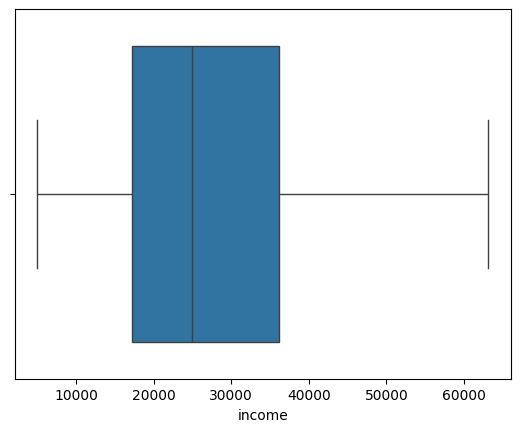

In [6]:
sns.boxplot(x=data['income'])

In [7]:
from scipy.stats.mstats import winsorize

In [82]:
# data['sex'].replace({'FEMALE':1, 'MALE':0}, inplace=True)
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['region']= label_encoder.fit_transform(data['region'])
data['sex']= label_encoder.fit_transform(data['sex'])
data['car']= label_encoder.fit_transform(data['car'])
data['married']= label_encoder.fit_transform(data['married'])
data['current_act']= label_encoder.fit_transform(data['current_act'])
data['mortgage']= label_encoder.fit_transform(data['mortgage'])
data['save_act']= label_encoder.fit_transform(data['save_act'])


In [95]:
# Reading the Iris.csv file
X = data.iloc[:,0:10].values
y = data.iloc[:,10].values # attribute 4 is label data


In [96]:
X[0]

array([4.8000e+01, 1.0000e+00, 0.0000e+00, 1.7546e+04, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])

In [97]:
# Import Library for splitting data
from collections import Counter
from sklearn.model_selection import train_test_split
# Creating Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 50, test_size = 0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(Counter(y_train))
print(Counter(y_test))

(450, 10) (150, 10) (450,) (150,)
Counter({'NO': 235, 'YES': 215})
Counter({'NO': 91, 'YES': 59})


In [98]:
#show confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[81 10]
 [14 45]]


In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          NO       0.85      0.89      0.87        91
         YES       0.82      0.76      0.79        59

    accuracy                           0.84       150
   macro avg       0.84      0.83      0.83       150
weighted avg       0.84      0.84      0.84       150



In [105]:
#use Entropy
clf = DecisionTreeClassifier(criterion='entropy',max_depth=5) #set max_depth = 3
clf.fit(X_train,y_train)

# Predict Accuracy Score
y_pred = clf.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 0.8711111111111111
Test data accuracy: 0.8533333333333334


In [106]:
Y_pred=clf.predict(X_test)
print(Y_pred)

['YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES'
 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO'
 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES'
 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES'
 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'NO' 'NO' 'NO']


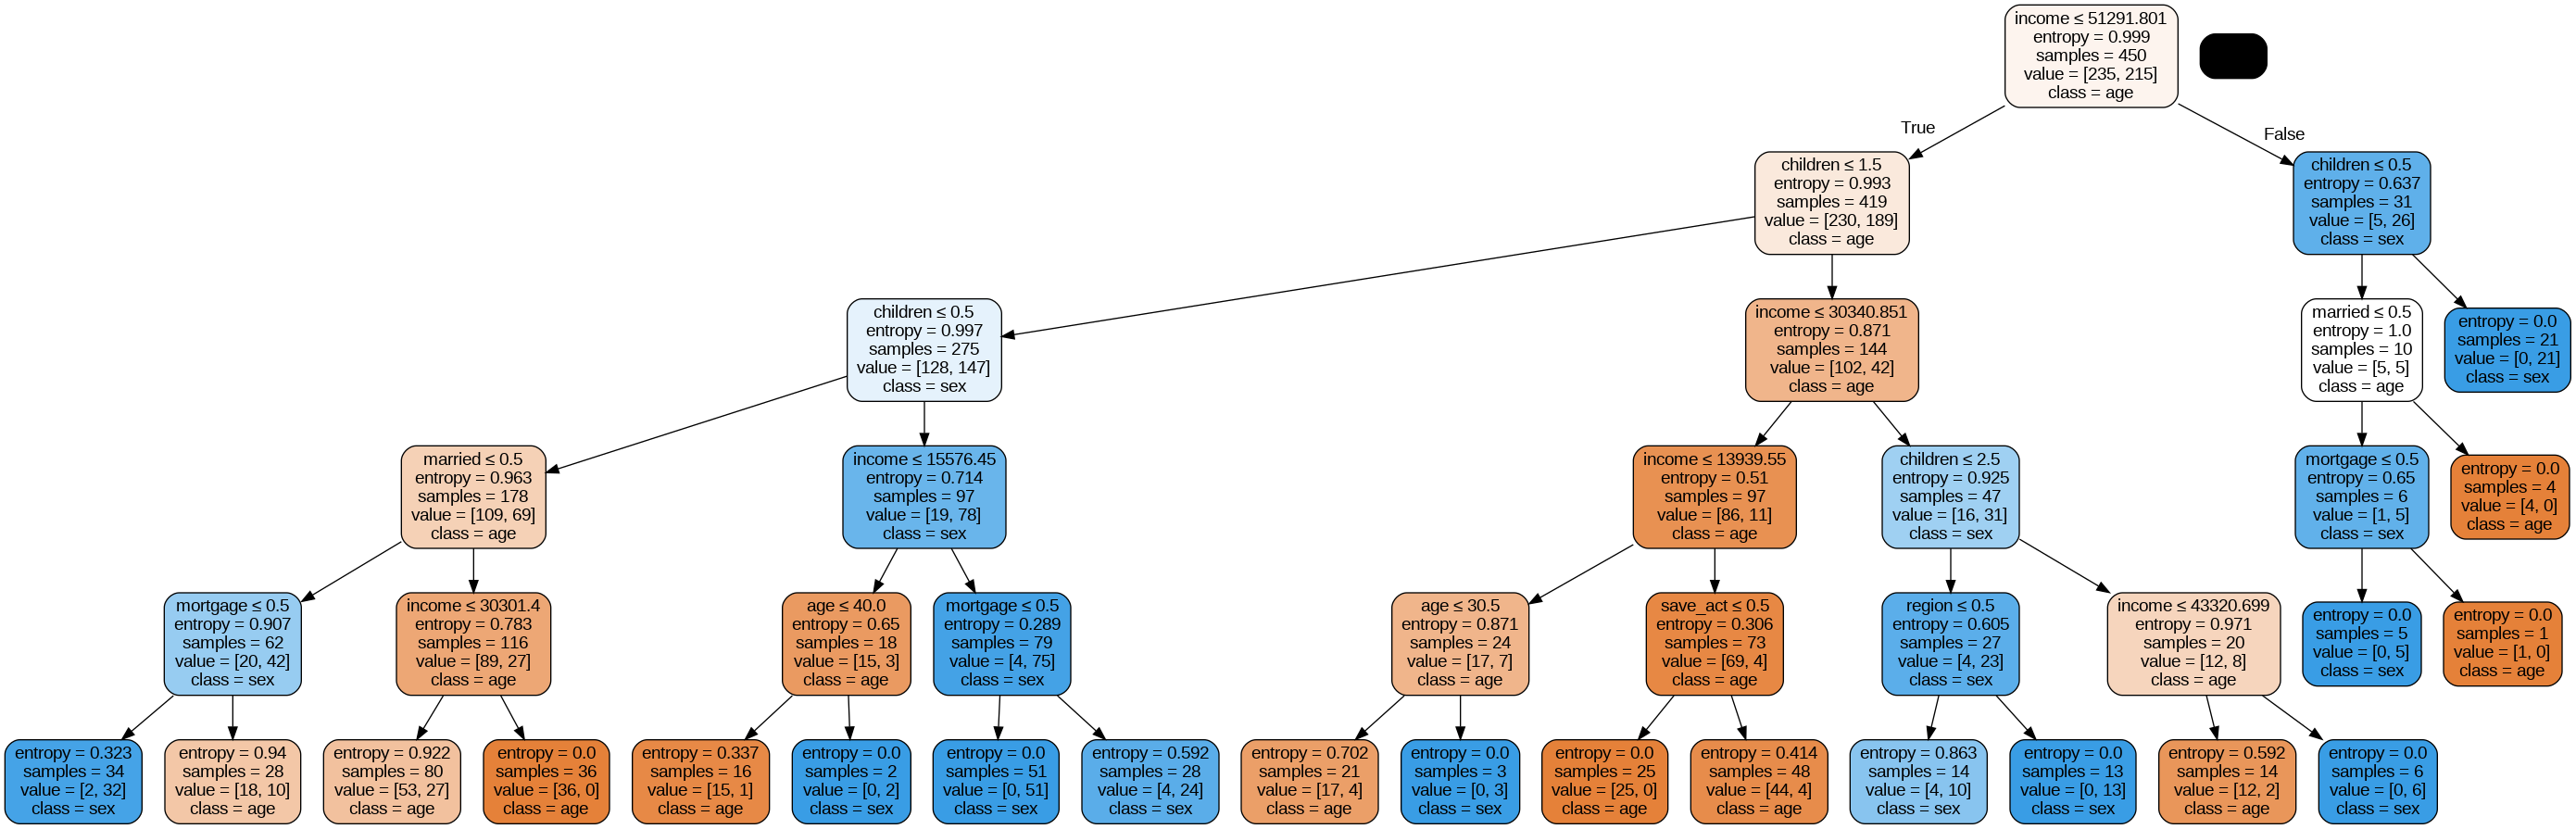

In [107]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
feature_cols = ["age", "sex", "region", "income", "married", "children", "car", "save_act", "current_act","mortgage"]
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=["age", "sex", "region", "income", "married", "children", "car", "save_act", "current_act","mortgage"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())
#Values are number of instances per class.


In [108]:
#the tree can also be exported in textual format with the function export_text.
from sklearn.tree import export_text
clf = DecisionTreeClassifier(random_state=0)
decision_tree = clf.fit(X_train,y_train)
rules = export_text(decision_tree, feature_names=feature_cols)
print(rules)

|--- income <= 51291.80
|   |--- children <= 1.50
|   |   |--- children <= 0.50
|   |   |   |--- married <= 0.50
|   |   |   |   |--- mortgage <= 0.50
|   |   |   |   |   |--- income <= 16479.60
|   |   |   |   |   |   |--- age <= 32.50
|   |   |   |   |   |   |   |--- class: YES
|   |   |   |   |   |   |--- age >  32.50
|   |   |   |   |   |   |   |--- class: NO
|   |   |   |   |   |--- income >  16479.60
|   |   |   |   |   |   |--- class: YES
|   |   |   |   |--- mortgage >  0.50
|   |   |   |   |   |--- save_act <= 0.50
|   |   |   |   |   |   |--- class: YES
|   |   |   |   |   |--- save_act >  0.50
|   |   |   |   |   |   |--- class: NO
|   |   |   |--- married >  0.50
|   |   |   |   |--- save_act <= 0.50
|   |   |   |   |   |--- mortgage <= 0.50
|   |   |   |   |   |   |--- income <= 21559.20
|   |   |   |   |   |   |   |--- age <= 41.50
|   |   |   |   |   |   |   |   |--- income <= 15933.75
|   |   |   |   |   |   |   |   |   |--- class: NO
|   |   |   |   |   |   |   |   |--

In [109]:
X=[
    [45.0, 1.0, 2.0 , 40000.0, 0.0, 1.0, 1.0 , 1.0, 0.0, 0.0],
    [33.0, 0.0, 1.0 , 28000.0, 1.0, 2.0, 0.0 , 1.0, 0.0, 1.0],
    [50.0, 1.0, 0.0 , 60000.0, 0.0, 0.0, 1.0 , 0.0, 1.0, 1.0],
]
Y_pred=clf.predict(X)
print(Y_pred)

['YES' 'NO' 'YES']
